In [1]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

def MVAExato(Si, Vi, Ni, Ri, N, K, Z):
    R_resultado = []
    X0_resultado = []

    print("{:<15}".format("Interação"), end="", flush=True)

    for i in range(0, K):
        print("{:<15}".format("R" + str(i)), end="", flush=True)

    print("{:<15} {:<15}".format("R", "X0"), end="", flush=True)

    for i in range(0, K):
        print("{:<15}".format("N" + str(i)), end="", flush=True)

    for n in range(0, N):
        print("\n")
        print("{:<15}".format(str(n + 1)), end="", flush=True)
        for i in range(0, K):
            Ri[i] = Si[i] * (1 + Ni[i])
            print("{:<15}".format(str(round(Ri[i], 4))), end="", flush=True)

        R = 0
        for i in range(0, K):
            R += Ri[i] * Vi[i]

        X = (n + 1) / (R + Z)

        print("{:<15}".format(str(round(R, 4))), end="", flush=True)
        print("{:<15}".format(str(round(X, 4))), end="", flush=True)

        for i in range(0, K):
            Ni[i] = X * Vi[i] * Ri[i]
            print("{:<15}".format(str(round(Ni[i], 4))), end="", flush=True)
        
        R_resultado.append(R)
        X0_resultado.append(X)
    
    return (R_resultado, X0_resultado)


def maximo(Ni, Na, K):
    maior = 0
    for i in range(0, K):
        if abs(Ni[i] - Na[i]) > maior:
            maior = abs(Ni[i] - Na[i])

    return maior


def MVAAproximado(Si, Vi, Ni, Ri, N, K, Z, e=0.001):
    print("{:<15}".format("Interação"), end="", flush=True)

    Na = []

    for i in range(0, K):
        Ni[i] = N / K
        Na.append(0)
        print("{:<15}".format("R" + str(i)), end="", flush=True)

    print("{:<15} {:<15}".format("R", "X0"), end="", flush=True)

    for i in range(0, K):
        print("{:<15}".format("N" + str(i)), end="", flush=True)

    constante = (N - 1) / N
    n = 0
    while maximo(Ni, Na, K) > e:
        print("\n")
        print("{:<15}".format(str(n + 1)), end="", flush=True)
        for i in range(0, K):
            Ri[i] = Si[i] * (1 + (constante * Ni[i]))
            print("{:<15}".format(str(round(Ri[i], 4))), end="", flush=True)

        R = 0
        for i in range(0, K):
            R += Ri[i] * Vi[i]

        X = N / (R + Z)

        print("{:<15}".format(str(round(R, 4))), end="", flush=True)
        print("{:<15}".format(str(round(X, 4))), end="", flush=True)

        for i in range(0, K):
            Na[i] = Ni[i]
            Ni[i] = X * Vi[i] * Ri[i]
            print("{:<15}".format(str(round(Ni[i], 4))), end="", flush=True)

        n = n + 1

Interação      R0             R1             R2             R               X0             N0             N1             N2             

1              0.9167         2.2            1.4667         44.0           0.4167         6.1111         9.1667         3.0556         

2              0.8507         2.9125         0.7806         46.6389        0.395          5.3758         11.503         1.5414         

3              0.7634         3.5784         0.4929         50.4619        0.3672         4.4853         13.1408        0.905          

4              0.6576         4.0451         0.3719         52.8331        0.3519         3.7028         14.2351        0.6545         

5              0.5647         4.357          0.3243         54.2271        0.3435         3.1035         14.9656        0.557          

6              0.4935         4.5652         0.3058         55.0776        0.3385         2.6733         15.4549        0.5177         

7              0.4425         4.7046    

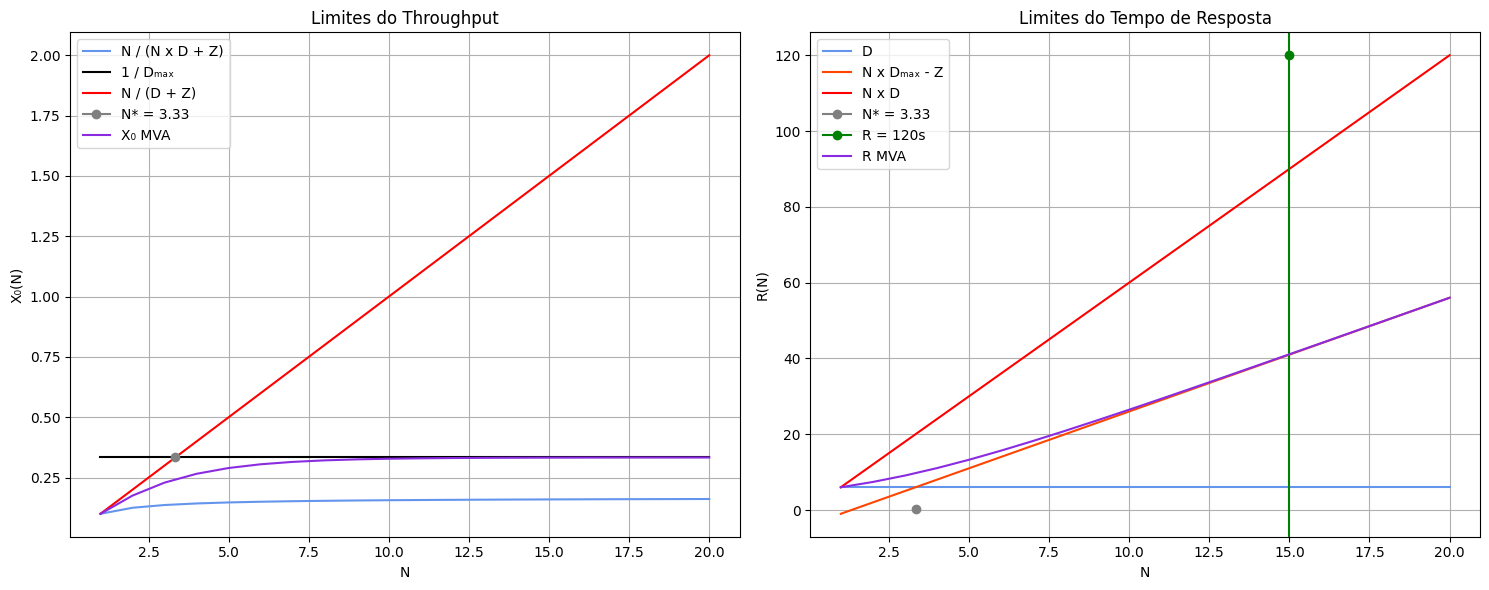

D: 6.0 | Dₘₐₓ: 3.0 | N*: 3.33


In [6]:
# Dados de exemplo
# K = 3
# N = 20
# R = 0
# Z = 4
# Si = [0.125, 0.3, 0.2]
# Vi = [16, 10, 5]
# epsilon = 0.01

K = 3
N = 20
Z = 4
Si = [0.125, 0.3, 0.2 ]
Vi = [16,10,5]
Ni = []
Ri = []
Di = []
N_arr = [i for i in range(1, N + 1)]

for i in range(0, K):
    Di.append(Vi[i] * Si[i])
    Ni.append(0)
    Ri.append(0)
MVAAproximado(Si, Vi, Ni, Ri, N, K, Z)

throughput_min = []
throughput_max1 = []
throughput_max2 = []

resposta_min1 = []
resposta_min2 = []
resposta_max = []

D = sum(Di)
Dmax = max(Di)
N_otimo = (D + Z) / Dmax

for i in range(len(N_arr)):
    throughput_min.append(N_arr[i] / ((N_arr[i] * D) + Z))
    throughput_max1.append(1 / Dmax)
    throughput_max2.append(N_arr[i] / (D + Z))
    resposta_min1.append(D)
    resposta_min2.append((N_arr[i] * Dmax) - Z)
    resposta_max.append(N_arr[i] * D)

# Criação de um subplot com 2 gráficos
# Gráfico 1: Limites do Throughput e Limites do Tempo de Resposta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(N_arr, throughput_min, color="cornflowerblue", label="N / (N x D + Z)")
ax1.plot(N_arr, throughput_max1, color="black", label="1 / Dₘₐₓ")
ax1.plot(N_arr, throughput_max2, color="red", label="N / (D + Z)")
ax1.plot(N_otimo, (N_otimo / (D + Z)), marker="o", color="gray", label=f"N* = {N_otimo:.2f}")
ax1.plot(N_arr, mva_X0, color="blueviolet", label="X₀ MVA")
ax1.set_xlabel("N")
ax1.set_ylabel("X₀(N)")
ax1.grid(True)
ax1.set_title("Limites do Throughput")
ax1.legend()

ax2.plot(N_arr, resposta_min1, color="cornflowerblue", label="D")
ax2.plot(N_arr, resposta_min2, color="orangered", label="N x Dₘₐₓ - Z")
ax2.plot(N_arr, resposta_max, color="red", label="N x D")
ax2.plot(N_otimo, (N_otimo / (D + Z)), marker="o", color="grey", label=f"N* = {N_otimo:.2f}")
ax2.plot(15, 120, marker="o", color="green", label=f"R = 120s")
ax2.axvline(x = 15, color="green")
ax2.plot(N_arr, mva_R, color="blueviolet", label="R MVA")
ax2.set_xlabel("N")
ax2.set_ylabel("R(N)")
ax2.grid(True)
ax2.set_title("Limites do Tempo de Resposta")
ax2.legend()

# Ajusta o layout e salva a imagem
plt.tight_layout()
plt.savefig("./graficos_resolucao_alta.png", dpi=300)

plt.show()

print(f"D: {D} | Dₘₐₓ: {Dmax} | N*: {N_otimo:.2f}")

# Gráfico 2: Limites do Throughput (Individual)
# plt.figure(figsize=(8, 6))
# plt.plot(N_arr, throughput_min, color="cornflowerblue", label="N / (N x D + Z)")
# plt.plot(N_arr, throughput_max1, color="black", label="1 / Dₘₐₓ")
# plt.plot(N_arr, throughput_max2, color="red", label="N / (D + Z)")
# plt.plot(N_otimo, (N_otimo / (D + Z)), marker="o", color="gray", label=f"N* = {N_otimo:.2f}")
# plt.plot(N_arr, mva_X0, color="blueviolet", label="X₀ MVA")
# plt.xlabel("N")
# plt.ylabel("X₀(N)")
# plt.grid(True)
# plt.title("Limites do Throughput")
# plt.legend()
# plt.savefig("./grafico_throughput.png", dpi=300)
# plt.show()


# Gráfico 3: Limites do Tempo de Resposta (Individual)
# plt.figure(figsize=(8, 6))
# plt.plot(N_arr, resposta_min1, color="cornflowerblue", label="D")
# plt.plot(N_arr, resposta_min2, color="orangered", label="N x Dₘₐₓ - Z")
# plt.plot(N_arr, resposta_max, color="red", label="N x D")
# plt.plot(N_otimo, (N_otimo / (D + Z)), marker="o", color="grey", label=f"N* = {N_otimo:.2f}")
# plt.plot(15, 120, marker="o", color="green", label=f"R = 120s")
# plt.axvline(x = 15, color="green")
# plt.plot(N_arr, mva_R, color="blueviolet", label="R MVA")
# plt.xlabel("N")
# plt.ylabel("R(N)")
# plt.grid(True)
# plt.title("Limites do Tempo de Resposta")
# plt.legend()
# plt.savefig("./grafico_tempo_resposta.png", dpi=300)
# plt.show()